In [1]:
import pandas as pd
import os
import re
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('D:/abstract/wos_0531/bib_360446/unique_multilabel_withlabel.csv', engine='python')

FileNotFoundError: [Errno 2] No such file or directory: 'D:/abstract/wos_0531/bib_360446/unique_multilabel_withlabel.csv'

In [4]:
df

,Abstract,topic,Research Areas,label,index
0,This paper presents an updated checklist of ma...,13,Marine & Freshwater Biology; Oceanography,Marine & Freshwater Biology,3
1,Small time behavior of gravity driven free sur...,16,Engineering; Oceanography,Engineering,2
2,This Collective Article includes records of 29...,13,Fisheries; Geology; Marine & Freshwater Biolog...,Marine & Freshwater Biology,3
3,This Collective Article presents information a...,13,Fisheries; Geology; Marine & Freshwater Biolog...,Marine & Freshwater Biology,3
4,The use of pesticides in agriculture has alway...,73,Engineering; Oceanography,Engineering,2
...,...,...,...,...,...
334760,The simplicity of the hydrochemical stationari...,40,Engineering; Geology; Water Resources,Water Resources,5
334761,In many smallholder farms in sub-Saharan Afric...,40,Geology; Meteorology & Atmospheric Sciences; W...,Water Resources,5
334762,In this study we tested whether we can use a t...,0,Environmental Sciences & Ecology; Remote Sensing,Geology,4
334763,A novel approach of using variability as a maj...,69,Meteorology & Atmospheric Sciences,Meteorology & Atmospheric Sciences,1


In [5]:
topic = df['topic']
label = df['index']

In [6]:
arr = np.zeros((100,7), dtype=np.int)
topic_7classes = pd.DataFrame(arr, columns=['Science & Technology - Other Topics',
                                     'Meteorology & Atmospheric Sciences',
                                     'Engineering',
                                     'Marine & Freshwater Biology',
                                     'Geology',
                                     'Water Resources',
                                     'Geochemistry & Geophysics'])
for i in range(len(topic)):
    topic_7classes.iloc[int(topic[i]),label[i]] += 1

C:\Users\Velaciela\AppData\Local\Temp\ipykernel_36048\135150361.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arr = np.zeros((100,7), dtype=np.int)


In [7]:
for i in range(100):
    topic_7classes.loc[i, 'Total'] = topic_7classes.iloc[i, 0]+topic_7classes.iloc[i, 1]+topic_7classes.iloc[i, 2]+topic_7classes.iloc[i, 3]+topic_7classes.iloc[i, 4]+topic_7classes.iloc[i, 5]+topic_7classes.iloc[i, 6]

In [8]:
topic_7classes['Total'] = topic_7classes['Total'].astype(int)

In [9]:
topic_7classes

,Science & Technology - Other Topics,Meteorology & Atmospheric Sciences,Engineering,Marine & Freshwater Biology,Geology,Water Resources,Geochemistry & Geophysics,Total
0,261,2556,519,141,1790,1785,66,7118
1,78,13,118,6310,188,147,9,6863
2,128,47,186,128,5301,33,988,6811
3,22,19,60,6173,43,45,7,6369
4,221,131,1417,928,3060,486,63,6306
...,...,...,...,...,...,...,...,...
95,1,2,818,3,23,3,2,852
96,24,155,22,13,210,237,7,668
97,23,37,388,32,40,34,6,560
98,41,35,132,153,40,86,1,488


In [10]:
arr = np.zeros((100,7), dtype=np.int)
topic_7classes_p = pd.DataFrame(arr, columns=['Science & Technology - Other Topics',
                                     'Meteorology & Atmospheric Sciences',
                                     'Engineering',
                                     'Marine & Freshwater Biology',
                                     'Geology',
                                     'Water Resources',
                                     'Geochemistry & Geophysics'])
for i in range(100):
    for j in range(7):
        topic_7classes_p.iloc[i,j] = topic_7classes.iloc[i,j]/topic_7classes.loc[i,'Total']

C:\Users\Velaciela\AppData\Local\Temp\ipykernel_36048\2720243131.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arr = np.zeros((100,7), dtype=np.int)


In [11]:
topic_7classes_p = round(topic_7classes_p,3)

In [12]:
topic_7classes_p

,Science & Technology - Other Topics,Meteorology & Atmospheric Sciences,Engineering,Marine & Freshwater Biology,Geology,Water Resources,Geochemistry & Geophysics
0,0.037,0.359,0.073,0.020,0.251,0.251,0.009
1,0.011,0.002,0.017,0.919,0.027,0.021,0.001
2,0.019,0.007,0.027,0.019,0.778,0.005,0.145
3,0.003,0.003,0.009,0.969,0.007,0.007,0.001
4,0.035,0.021,0.225,0.147,0.485,0.077,0.010
...,...,...,...,...,...,...,...
95,0.001,0.002,0.960,0.004,0.027,0.004,0.002
96,0.036,0.232,0.033,0.019,0.314,0.355,0.010
97,0.041,0.066,0.693,0.057,0.071,0.061,0.011
98,0.084,0.072,0.270,0.314,0.082,0.176,0.002


In [13]:
ent_list = []
import math
for i in range(100):
    lis = list(topic_7classes_p.loc[i,:])
    
    ent = 0
    for i in lis:
        if i>0:
            ent = ent - i*math.log(i)
    ent = round(ent,3)
    ent_list.append(ent)


In [14]:
len(ent_list)

100

7


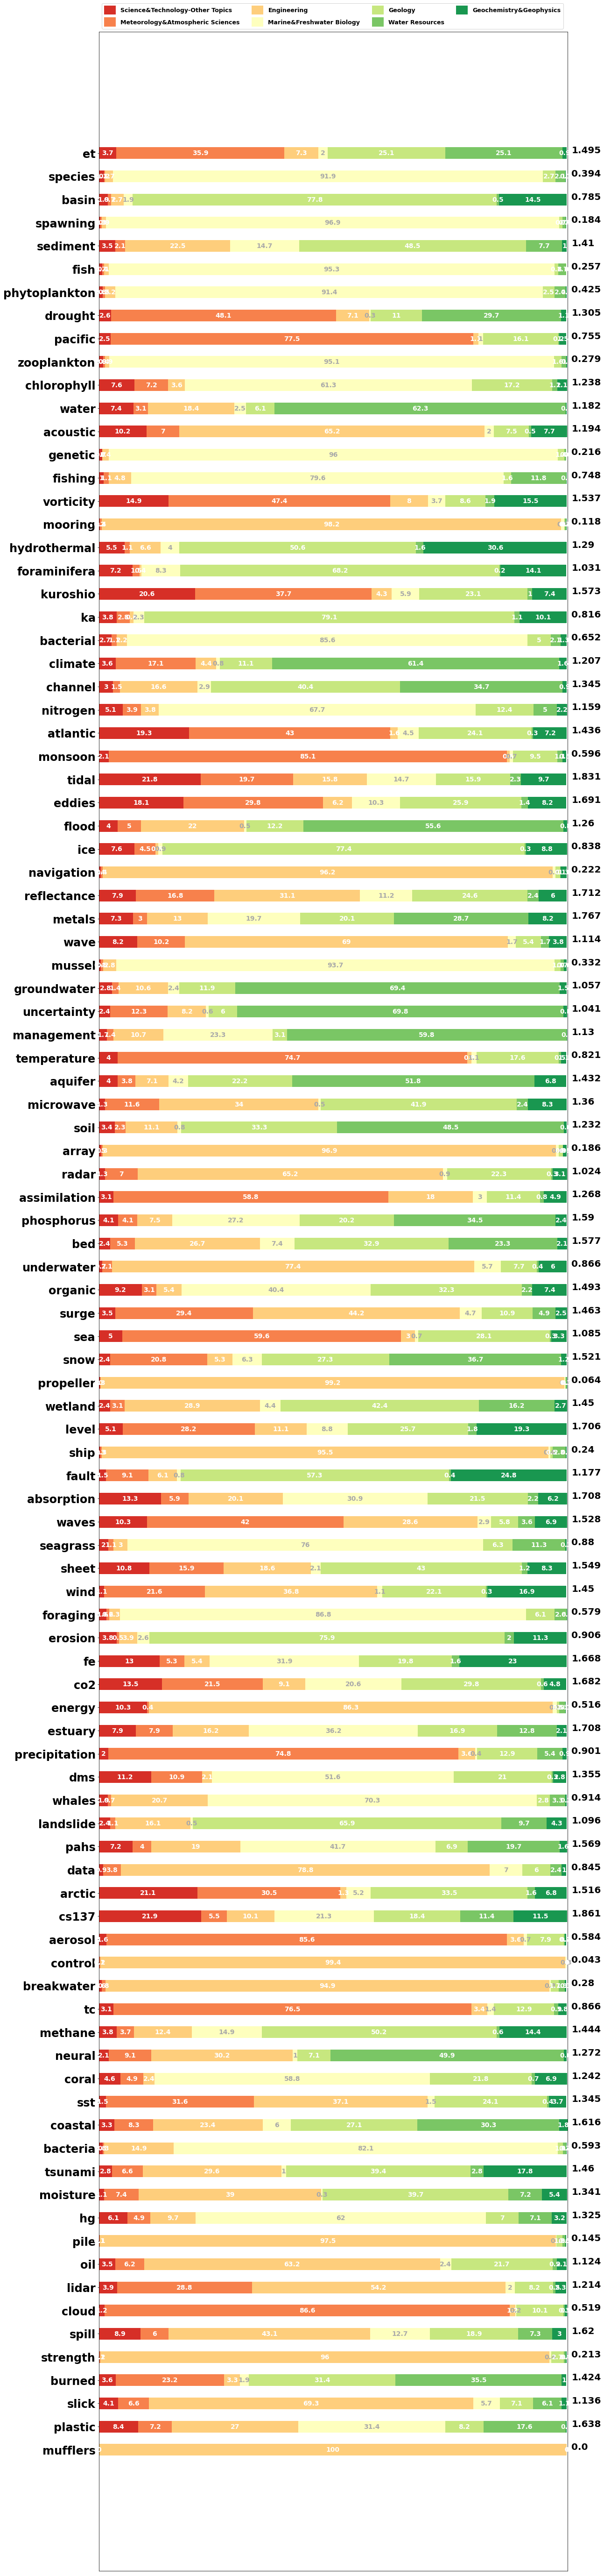

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams["font.weight"]='bold'

#for i in range(len(topic_7classes_p)):
#    for j in range(7):
#        topic_7classes_p.iloc[i,j]=round(topic_7classes_p.iloc[i,j]*100,2)

category_names = ['Science&Technology-Other Topics',
                                     'Meteorology&Atmospheric Sciences',
                                     'Engineering',
                                     'Marine&Freshwater Biology',
                                     'Geology',
                                     'Water Resources',
                                     'Geochemistry&Geophysics']
results = dict()
#del year_7classes['Total']
topic_name = pd.read_csv('D:/abstract/wos_0531/bib_360446/topic_name.csv')
for i in range(100):
    results[topic_name.iloc[i,0]] = list(topic_7classes_p.iloc[i])


def survey(results, category_names, s, e):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.1, 0.9, data.shape[1]))
    print(data.shape[1])

    fig, ax = plt.subplots(figsize=(18, 100))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color, fontsize=14)
        plt.yticks(size=24,weight='bold')
    ax.legend(ncol=4, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=12.6, handleheight=2)
        
    entropy = ent_list[s:e]
    for j in range(100):
        ax.text(101,j,str(entropy[j]),fontweight='bold', fontsize=20)
    #ax.set_yticklabels(labels,fontsize=14)
    return fig, ax

s=0
e=100
survey(results, category_names, s, e)

plt.show()

7


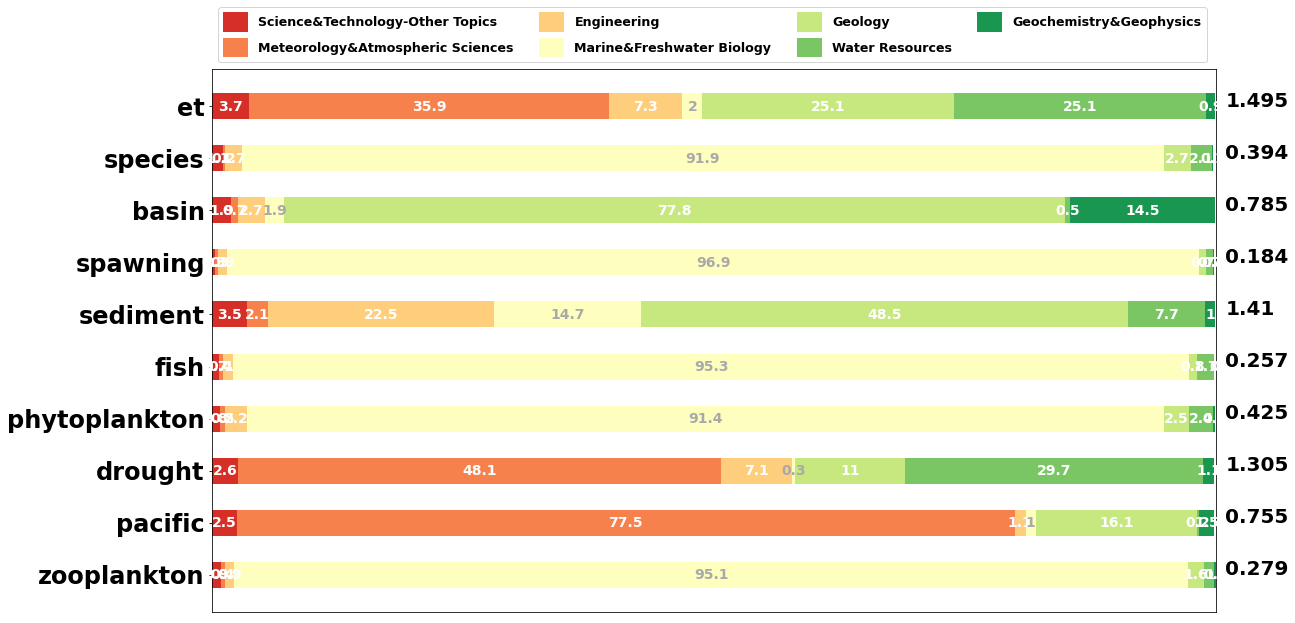

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams["font.weight"]='bold'

for i in range(len(topic_7classes_p)):
    for j in range(7):
        topic_7classes_p.iloc[i,j]=round(topic_7classes_p.iloc[i,j]*100,2)

category_names = ['Science&Technology-Other Topics',
                                     'Meteorology&Atmospheric Sciences',
                                     'Engineering',
                                     'Marine&Freshwater Biology',
                                     'Geology',
                                     'Water Resources',
                                     'Geochemistry&Geophysics']
results = dict()
#del year_7classes['Total']
topic_name = pd.read_csv('D:/abstract/wos_0531/bib_360446/topic_name.csv')
for i in range(10):
    results[topic_name.iloc[i,0]] = list(topic_7classes_p.iloc[i])


def survey(results, category_names, s, e):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.1, 0.9, data.shape[1]))
    print(data.shape[1])

    fig, ax = plt.subplots(figsize=(18, 10))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color, fontsize=14)
        plt.yticks(size=24,weight='bold')
    ax.legend(ncol=4, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=12.6, handleheight=2)
        
    entropy = ent_list[s:e]
    for j in range(10):
        ax.text(101,j,str(entropy[j]),fontweight='bold', fontsize=20)
    #ax.set_yticklabels(labels,fontsize=14)
    return fig, ax

s=0
e=10
survey(results, category_names, s, e)

plt.show()

7


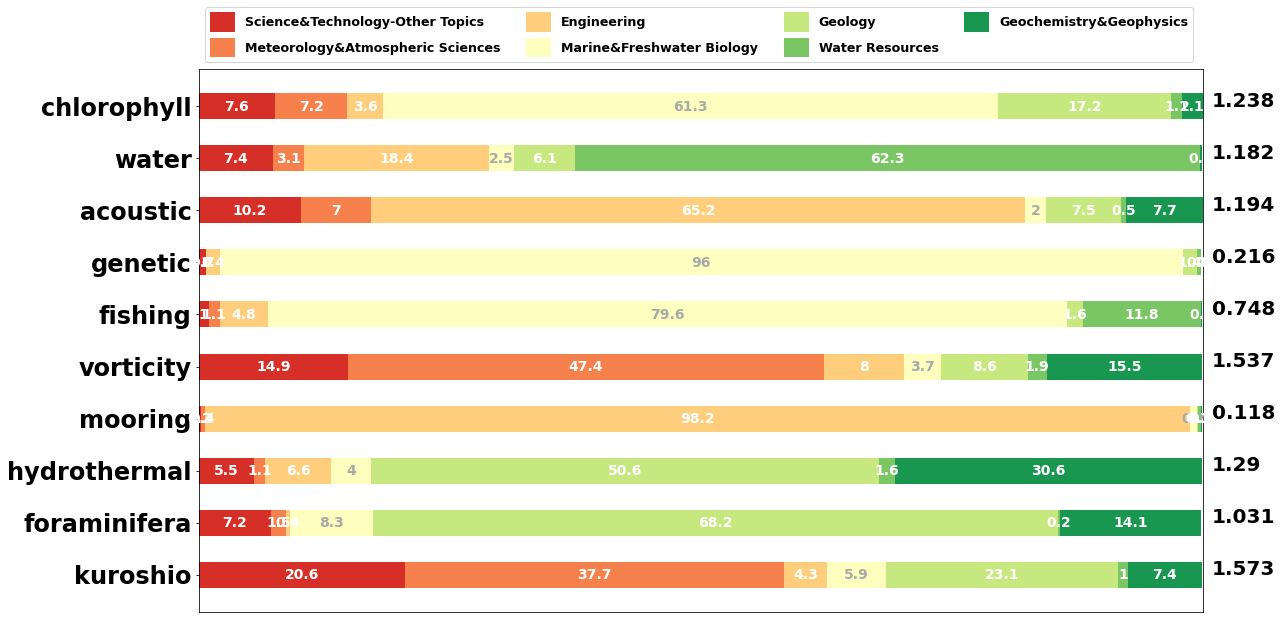

In [35]:
results = dict()
s=10
e=20
for i in range(s,e):
    results[topic_name.iloc[i,0]] = list(topic_7classes_p.iloc[i])
survey(results, category_names, s, e)
plt.show()

7


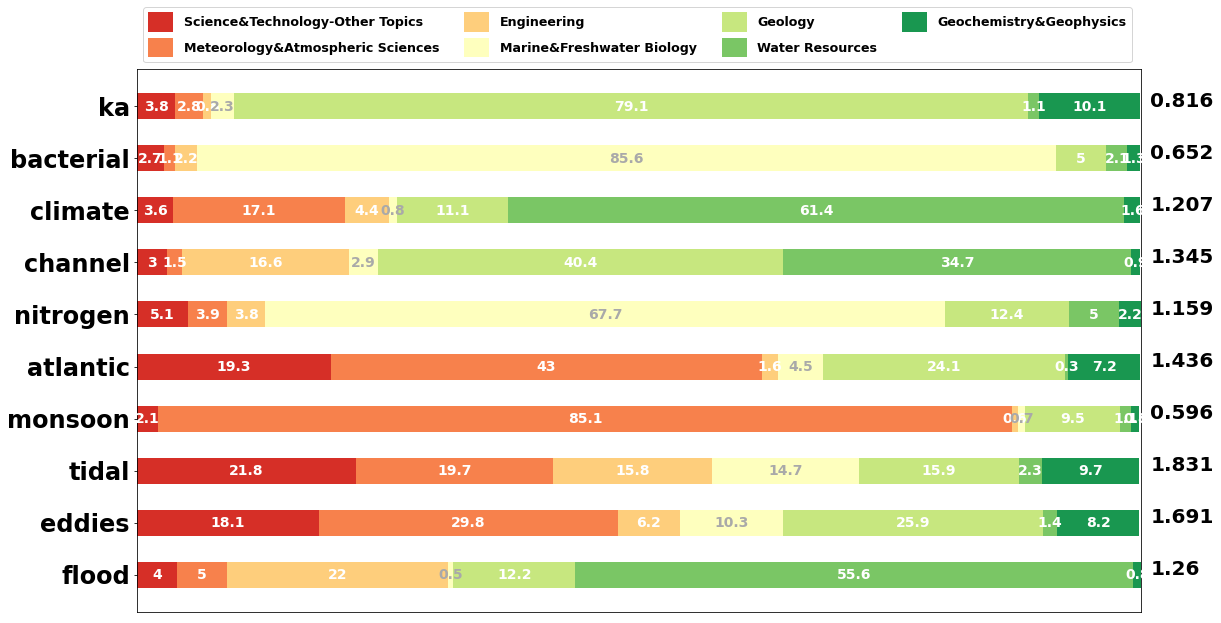

In [36]:
results = dict()
s=20
e=30
for i in range(s,e):
    results[topic_name.iloc[i,0]] = list(topic_7classes_p.iloc[i])
survey(results, category_names, s, e)
plt.show()

7


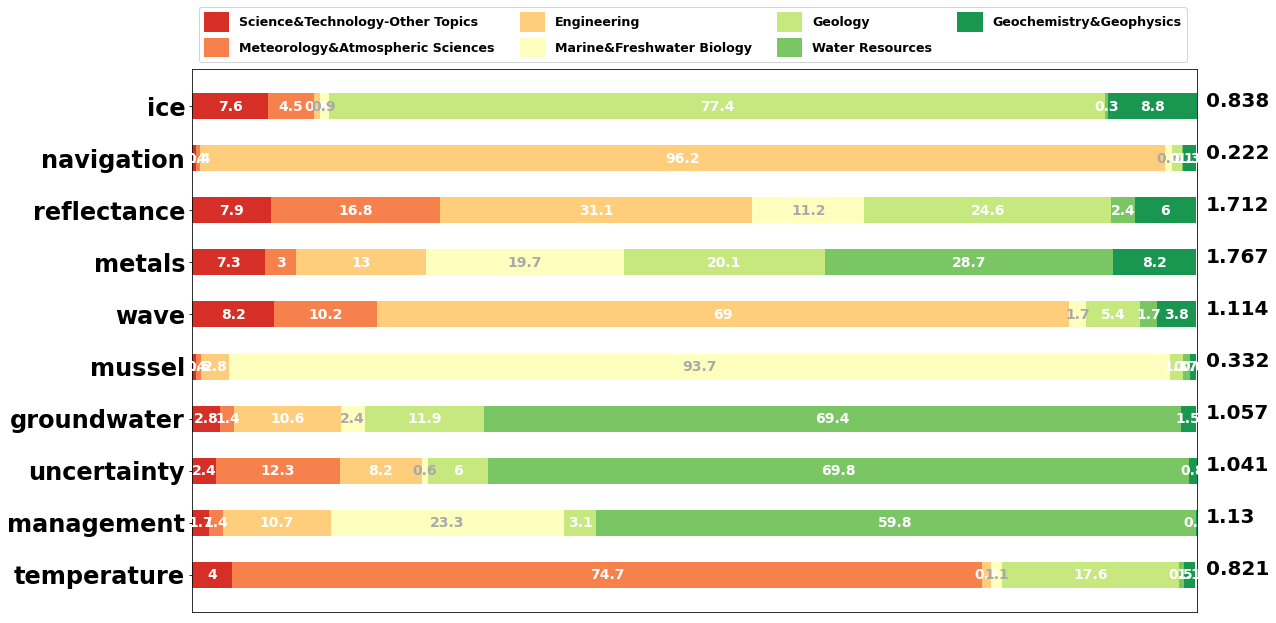

In [37]:
results = dict()
s=30
e=40
for i in range(s,e):
    results[topic_name.iloc[i,0]] = list(topic_7classes_p.iloc[i])
survey(results, category_names, s, e)
plt.show()

7


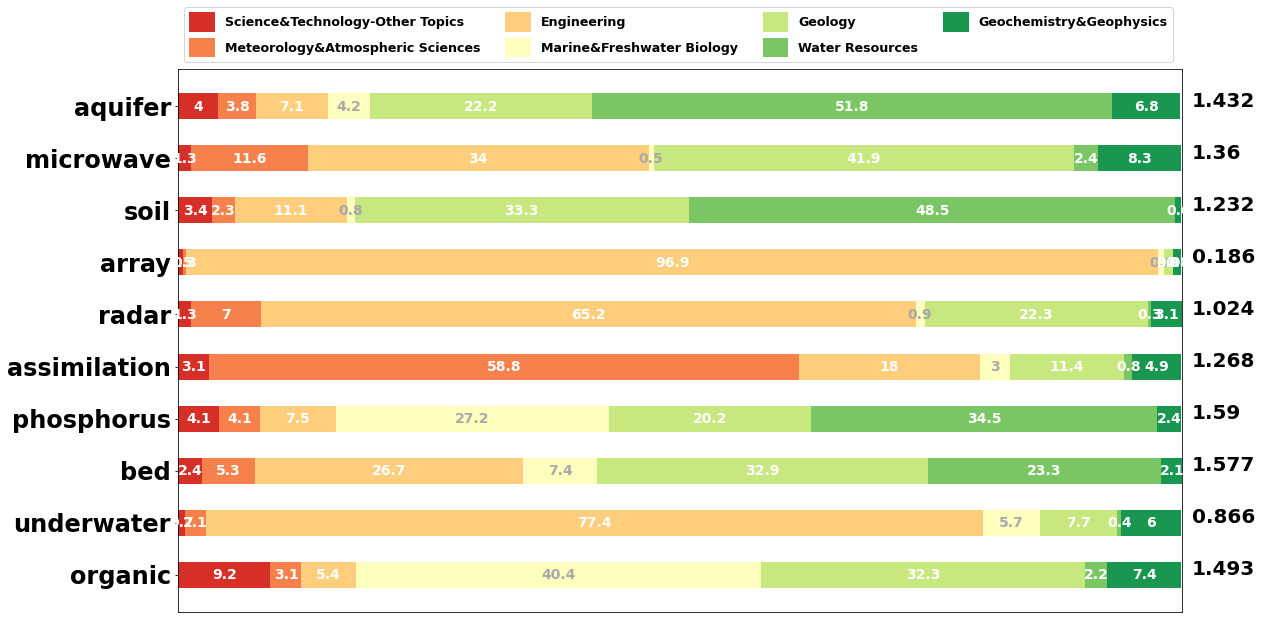

In [38]:
results = dict()
s=40
e=50
for i in range(s,e):
    results[topic_name.iloc[i,0]] = list(topic_7classes_p.iloc[i])
survey(results, category_names, s, e)
plt.show()

7


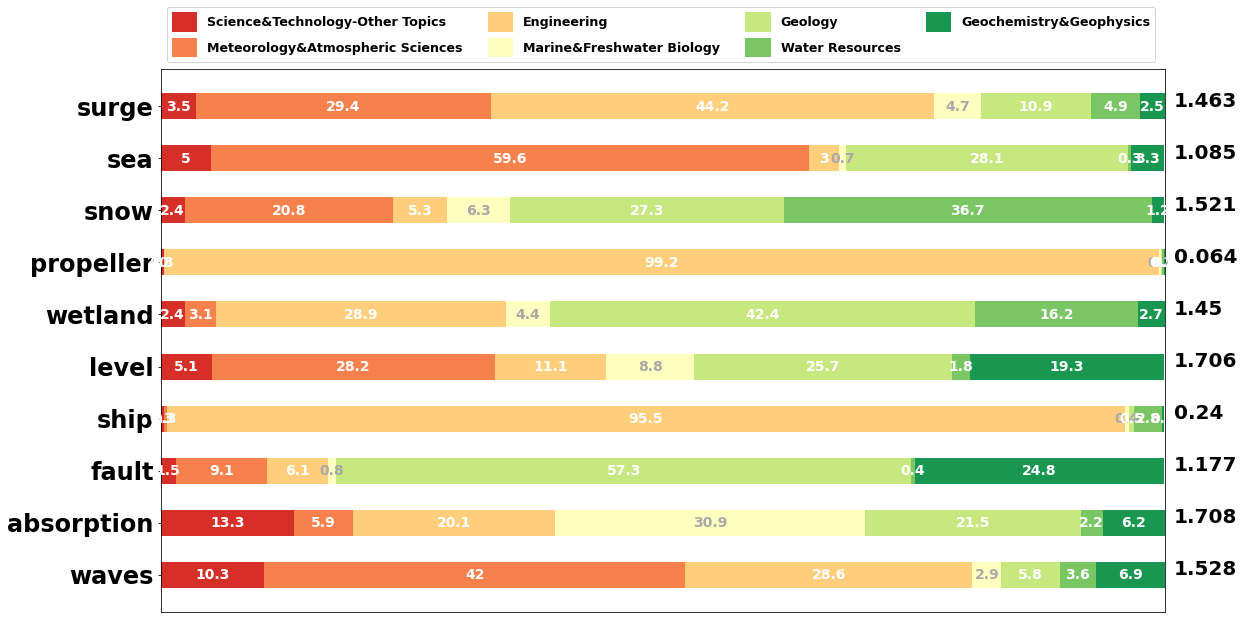

In [39]:
results = dict()
s=50
e=60
for i in range(s,e):
    results[topic_name.iloc[i,0]] = list(topic_7classes_p.iloc[i])
survey(results, category_names, s, e)
plt.show()

7


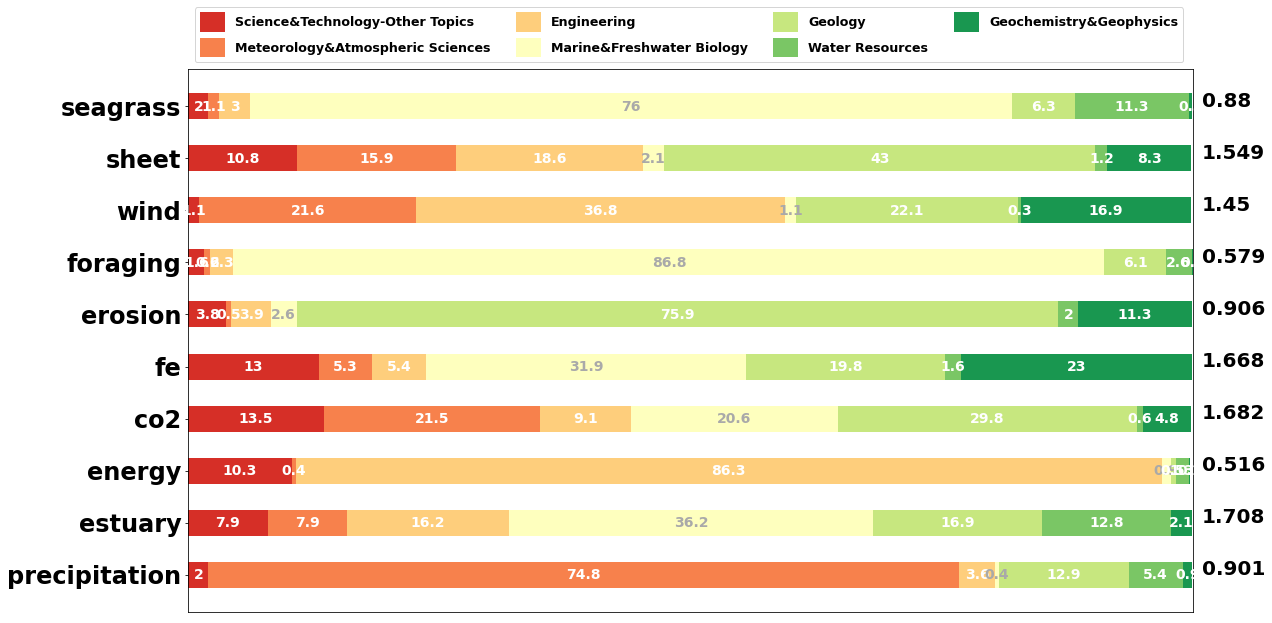

In [40]:
results = dict()
s=60
e=70
for i in range(s,e):
    results[topic_name.iloc[i,0]] = list(topic_7classes_p.iloc[i])
survey(results, category_names, s, e)
plt.show()

7


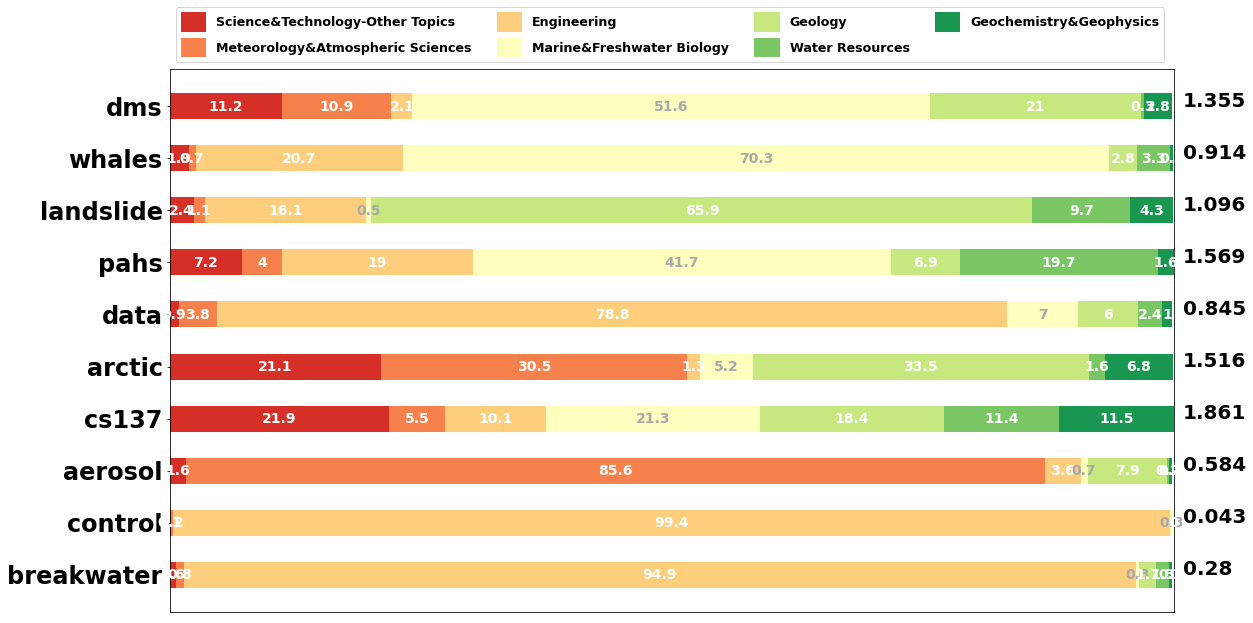

In [41]:
results = dict()
s=70
e=80
for i in range(s,e):
    results[topic_name.iloc[i,0]] = list(topic_7classes_p.iloc[i])
survey(results, category_names, s, e)
plt.show()

7


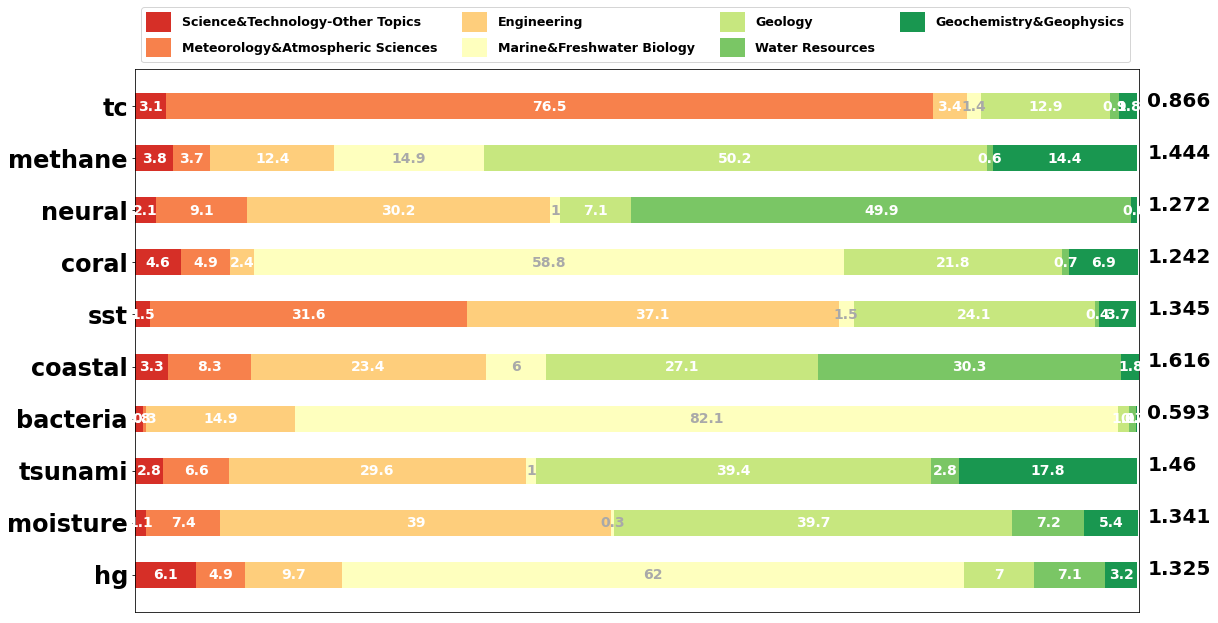

In [42]:
results = dict()
s=80
e=90
for i in range(s,e):
    results[topic_name.iloc[i,0]] = list(topic_7classes_p.iloc[i])
survey(results, category_names, s, e)
plt.show()

7


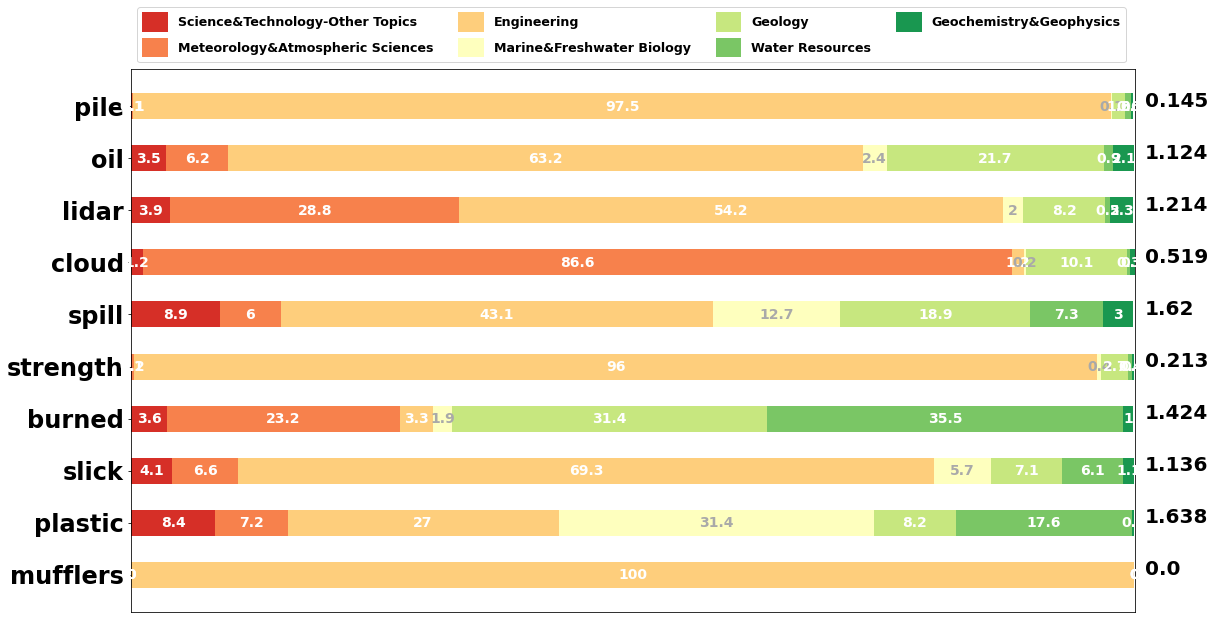

In [43]:
results = dict()
s=90
e=100
for i in range(s,e):
    results[topic_name.iloc[i,0]] = list(topic_7classes_p.iloc[i])
survey(results, category_names, s, e)
plt.show()

In [136]:
np.argsort(ent_list)

array([99, 78, 53, 16, 90,  3, 43, 95, 13, 31, 56,  5,  9, 79, 35,  1,  6,
       67, 93, 63, 77, 86, 26, 21, 14,  8,  2, 20, 39, 30, 74, 80, 48, 60,
       69, 64, 71, 44, 18, 37, 36, 51, 72, 34, 91, 38, 97, 24, 57, 11, 12,
       22, 92, 42, 10, 83, 29, 45, 82, 17,  7, 89, 88, 84, 23, 70, 41,  4,
       96, 40, 25, 81, 62, 54, 87, 50, 49,  0, 75, 52, 59, 15, 61, 73, 19,
       47, 46, 85, 94, 98, 65, 66, 28, 55, 58, 68, 32, 33, 27, 76],
      dtype=int64)

In [157]:
topic_name.iloc[68,0]

'estuary'

In [177]:
n=15
print(list(df[df['topic']==76]['Abstract'])[n])
print(list(df[df['topic']==76]['label'])[n])

Radium isotopes and radon are routinely used as tracers to quantify groundwater and porewater fluxes into coastal and freshwater systems. However, uncertainties associated with the determination of the tracer flux are often poorly addressed and often neglect all the potential errors associated with the conceptualization of the system (i.e., conceptual uncertainties). In this study, we assess the magnitude of some of the key uncertainties related to the determination of the radium and radon inputs supplied by groundwater and porewater fluxes into a waterbody (La Palme Lagoon, France). This uncertainty assessment is addressed through a single model ensemble approach, where a tracer mass balance is run multiple times with variable sets of assumptions and approaches for the key parameters determined through a sensitivity test. In particular, conceptual uncertainties linked to tracer concentration, diffusive fluxes, radon evasion to the atmosphere, and change of tracer inventory over time w